# Τεχνικές Eξόρυξης Δεδομένων - Άσκηση 1
_Βαργιάμης Μιχαήλ, sdi1300018_

---

In [1]:
import collections
import copy
import itertools
import numpy as np
import pandas as pd

In [2]:
netflix_titles = "netflix_titles.csv"
imdb_movies = "IMDb movies.csv"
imdb_ratings = "IMDb ratings.csv"

In [3]:
df1 = pd.read_csv(netflix_titles)
df2 = pd.read_csv(imdb_movies, low_memory=False)
df3 = pd.read_csv(imdb_ratings)

In [4]:
def replace_nan(df):
    for i in df.columns:
        df[i] = df[i].fillna("None")

In [5]:
replace_nan(df1)
replace_nan(df2)
replace_nan(df3)

In [6]:
# Use a subset of the actual dataset
df1 = df1.head(100)

### Ερώτημα 1

In [7]:
# print(df1.type.describe())
print(df1.type.value_counts())

Movie      79
TV Show    21
Name: type, dtype: int64


### Ερώτημα 2

In [8]:
# print(df1.query('release_year > 2015').type.describe())
print(df1.query('release_year > 2015').type.value_counts())

Movie      48
TV Show    18
Name: type, dtype: int64


### Ερώτημα 3

In [9]:
# print(df1.country.describe())
print(df1.country.value_counts())

United States                         33
India                                 11
South Korea                            6
Turkey                                 5
United Kingdom                         5
None                                   4
Indonesia                              4
Spain                                  3
Canada                                 3
Nigeria                                2
Romania                                2
Italy                                  2
France                                 2
Mexico                                 2
Poland, United States                  1
Portugal, Spain                        1
United States, Germany                 1
South Africa, China, United States     1
United States, France, Serbia          1
South Africa, Nigeria                  1
Japan                                  1
Iceland                                1
Egypt                                  1
Singapore                              1
Argentina       

### Ερώτημα 4

In [10]:
df0 = pd.DataFrame(columns = ['country', 'listed_in'])
for country, genre in zip(df1.country, df1.listed_in):
    countries = [s.strip() for s in country.split(',')]
    genres = [s.strip() for s in genre.split(',')]
    for c, g in itertools.product(countries, genres):
        temp = {'country': c, 'listed_in': g}
        df0 = df0.append(temp, ignore_index=True)

df0.groupby("country").listed_in.unique()

country
Argentina         [Action & Adventure, Comedies, International M...
Brazil            [International TV Shows, TV Dramas, TV Sci-Fi ...
Canada            [Documentaries, International Movies, Comedies...
China                    [Action & Adventure, International Movies]
Egypt                         [Horror Movies, International Movies]
France            [Comedies, Dramas, International Movies, Actio...
Germany                                        [Action & Adventure]
Hong Kong                [Action & Adventure, International Movies]
Iceland           [Dramas, Thrillers, Horror Movies, Internation...
India             [Horror Movies, International Movies, Thriller...
Indonesia         [Dramas, International Movies, Romantic Movies...
Italy             [Documentaries, International Movies, Dramas, ...
Japan                        [Anime Series, International TV Shows]
Mexico            [Dramas, International Movies, Crime TV Shows,...
Nigeria           [Dramas, International

### Ερώτημα 5

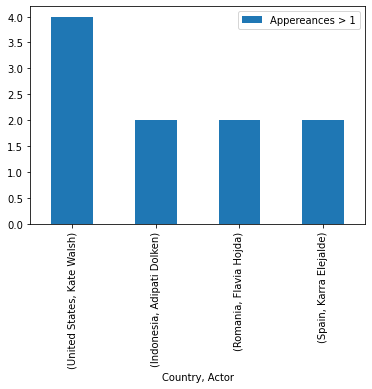

In [11]:
# For this question, no distinction were made between Movies and Tv Series

from collections import Counter

# Create dictionary with all actor appereances for each country
top_actors = {}
for cast, countries in zip(df1.cast, df1.country):
    for country in [s.strip() for s in countries.split(',')]:
        if country not in top_actors:
            top_actors[country] = [s.strip() for s in cast.split(',')]
        else:
            top_actors[country].extend([s.strip() for s in cast.split(',')])


# Create list of tuples ((country, most_famous_actor), appereances)
# for each country
data = []
for country, actor_list in top_actors.items():
    if country == "None":
        continue
    counter = Counter(actor_list)
    most_common = counter.most_common()
    
    if most_common[0][0] != "None" and most_common[0][1] > 1:
        data.append(((country, most_common[0][0]), most_common[0][1]))
    elif most_common[0][0] == "None" and most_common[1][1] > 1:
        data.append(((country, most_common[1][0]), most_common[1][1]))

# Import data into a dataframe and plot
df0 = pd.DataFrame(data, columns = ['Country, Actor', 'Appereances > 1'])
df0.plot.bar(x='Country, Actor')   
None

### Ερώτημα 6

Counter({'Mature': 37, 'Teens': 30, 'Older kids': 6, 'Little Kids': 3})
Counter({'Mature': 12, 'Teens': 8, 'Older kids': 1})


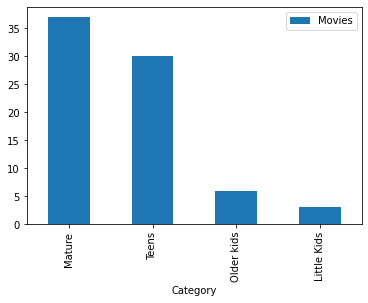

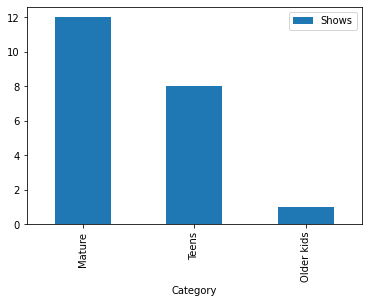

In [12]:
group_names = ["Little Kids","Older kids", "Teens", "Mature" ]
groups = {
    group_names[0]: ["G", "TV-Y", "TV-G"],
    group_names[1]: ["PG, TV-Y7", "TV-Y7-FV", "TV-PG"],
    group_names[2]: ["PG-13", "TV-14"],
    group_names[3]: ["R", "NC-17", "TV-MA"]
}

c_movies = Counter()
c_shows = Counter()
for r, t in zip(df1.rating, df1.type):
    for i in range(len(group_names)):
        if r in groups[group_names[i]]:
            if t == "Movie":
                c_movies[group_names[i]] += 1
            elif t == "TV Show":
                c_shows[group_names[i]] += 1
print(c_movies)
print(c_shows)
df_movies = pd.DataFrame.from_dict(c_movies, orient='index').reset_index().rename(columns={'index': 'Category', 0: 'Movies' })
df_shows = pd.DataFrame.from_dict(c_shows, orient='index').reset_index().rename(columns={'index': 'Category', 0: 'Shows' })
df_movies.plot.bar(x='Category')   
df_shows.plot.bar(x='Category')   
None

### Ερώτημα 7

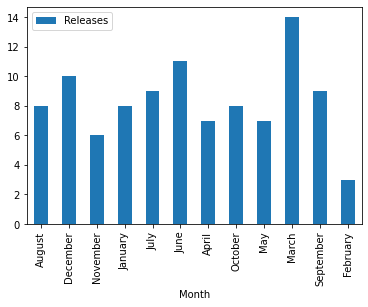

In [13]:
c = Counter()
for d in df1.date_added:
    d = d.split()[0]
    c[d] += 1
 
df0 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Month', 0: 'Releases' })
df0.plot.bar(x='Month')
None

### Ερώτημα 8

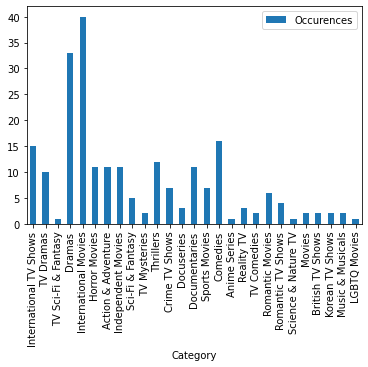

In [14]:
c = Counter()
for category_list in df1.listed_in:
    for category in [s.strip() for s in category_list.split(',')]:
        c[category] += 1
 
df0 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Category', 0: 'Occurences' })
df0.plot.bar(x='Category')
None

### Ερώτημα 9

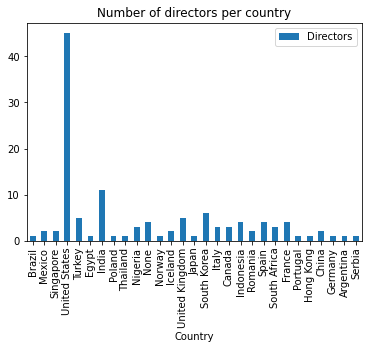

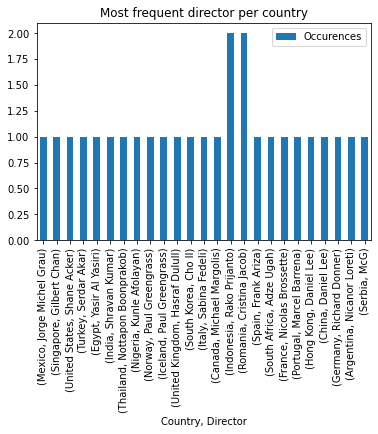

In [15]:
from collections import defaultdict
c = Counter()
directors_per_country = defaultdict(Counter)

for country_list, director_list in zip(df1.country, df1.director):
    for country in [s.strip() for s in country_list.split(',')]:
        for director in [s.strip() for s in director_list.split(',')]:
            c[country] += 1
            directors_per_country[country][director] += 1

data = []
for country, directors in directors_per_country.items():
    if country == "None":
        continue
    if directors.most_common()[0][0] != "None":
        data.append(((country, directors.most_common()[0][0]), directors.most_common()[0][1]))
    else:
        if len(directors) < 2:
            continue
        data.append(((country, directors.most_common()[1][0]), directors.most_common()[1][1]))

df00 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Country', 0: 'Directors' })
df00.plot.bar(x='Country', title="Number of directors per country")
None   
df01 = pd.DataFrame(data, columns = ['Country, Director', 'Occurences'])
df01.plot.bar(x='Country, Director', title="Most frequent director per country")   
None

### Ερώτημα 10

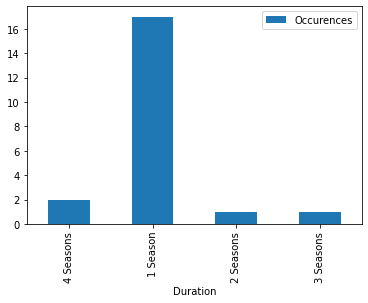

In [16]:
c = Counter()
for type, duration in zip(df1.type, df1.duration):
    if type != "TV Show":
        continue
    c[duration] += 1
 
df0 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Duration', 0: 'Occurences' })
df0.plot.bar(x='Duration')
None

### Ερώτημα 11

In [17]:
top_n = 10

df1 = pd.read_csv(netflix_titles)
df0 = pd.merge(df2[['imdb_title_id', 'title']], df1[['show_id', 'title']], how='inner', on='title')
df0 = pd.merge(df0, df3[['imdb_title_id', 'weighted_average_vote']], how='inner')

print(df0[['title', 'weighted_average_vote']].sort_values(by='weighted_average_vote', ascending=False)[:top_n])

                              title  weighted_average_vote
991                        Innocent                    9.0
1002                       Breakout                    9.0
398                    Pulp Fiction                    8.9
380                Schindler's List                    8.9
1301                      Inception                    8.8
1669         Much Ado About Nothing                    8.6
227                        Gol Maal                    8.6
736                     City of God                    8.6
2669  Ani... Dr. Kashinath Ghanekar                    8.6
609                         Koshish                    8.6


## Recommendation System

In [18]:
import nltk
from nltk.stem.snowball import SnowballStemmer

In [19]:
# Create corpus
corpus = [title + ' ' + description for title, description in zip(df1.title, df1.description)]

In [20]:
# Run this block for test corpus
#corpus = [
#    "an apple a day keeps the doctor away",
#    "mary ate an apple per day day okay",
#    "i don't like apples neither doctors",
#    "who eats apples and not doctors",
#    "two apples a day do not keep doctors away"
#]

In [21]:
# Stem corpus
stemmer = SnowballStemmer("english")
corpus = [' '.join([stemmer.stem(word) for word in sentence.split()]) for sentence in corpus]
print(corpus, "\n")

['3% in a futur where the elit inhabit an island paradis far from the crowd slums, you get one chanc to join the 3% save from squalor.', '7:19 after a devast earthquak hit mexico city, trap survivor from all walk of life wait to be rescu while tri desper to stay alive.', '23:59 when an armi recruit is found dead, his fellow soldier are forc to confront a terrifi secret that haunt their jungl island train camp.', '9 in a postapocalypt world, rag-dol robot hide in fear from danger machin out to extermin them, until a brave newcom join the group.', '21 a brilliant group of student becom card-count expert with the intent of swindl million out of las vega casino by play blackjack.', '46 a genet professor experi with a treatment for his comatos sister that blend medic and shaman cures, but unlock a shock side effect.', '122 after an aw accident, a coupl admit to a grisli hospit are separ and must find each other to escap — befor death find them.', '187 after one of his high school student at

### Part 1

In [22]:
# Boolean bag of words
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', binary=True)
count_vectorizer_vectors = count_vectorizer.fit_transform(corpus)

print(count_vectorizer.get_feature_names())
print(count_vectorizer_vectors.toarray())
print(count_vectorizer_vectors.shape)

['000', '000 afghans', '000 chanc', '000 counting', '000 euro', '000 euros', '000 feet', '000 fierc', '000 grand', '000 jewish', '000 kilomet', '000 new', '000 prize', '000 round', '000 square', '000 titl', '000 wasn', '000 year', '000 years', '007', '007 installment', '007 jame', '007 pit', '007 track', '009', '009 justic', '009 meet', '009 vs', '01', '01 backdrop', '09', '09 psycholog', '10', '10 000', '10 18', '10 año', '10 ben', '10 buddi', '10 citi', '10 cornish', '10 countries', '10 date', '10 day', '10 elit', '10 jour', '10 men', '10 million', '10 numbaria', '10 prepar', '10 seat', '10 secret', '10 sin', '10 song', '10 stori', '10 week', '10 women', '10 year', '10 years', '100', '100 000', '100 99th', '100 brother', '100 centuri', '100 day', '100 fresh', '100 halal', '100 hotter', '100 human', '100 jew', '100 meter', '100 million', '100 organ', '100 space', '100 thing', '100 year', '100 years', '1000', '1000 rupe', '1000 started', '100kg', '100kg femal', '101', '101 cadet', '101

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(7787, 118923)


In [23]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english', ngram_range=(1,2))
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(corpus)

print(tfidf_vectorizer.get_feature_names())
print(tfidf_vectorizer_vectors.toarray())
print(tfidf_vectorizer_vectors.shape)

['000', '10', '100', '12', '13', '1970s', '1980s', '20', '30', '50', 'abandon', 'abduct', 'abus', 'accept', 'accid', 'accident', 'account', 'accus', 'act', 'action', 'activist', 'actor', 'actress', 'adapt', 'addict', 'adopt', 'adult', 'adventur', 'adventure', 'affair', 'africa', 'african', 'ag', 'age', 'agent', 'agre', 'air', 'alien', 'alway', 'ambiti', 'america', 'american', 'amid', 'ancient', 'angel', 'anim', 'anoth', 'answer', 'anyth', 'apart', 'appear', 'arm', 'armi', 'arrang', 'arriv', 'art', 'artist', 'ask', 'aspir', 'assassin', 'assist', 'athlet', 'attack', 'attempt', 'attend', 'author', 'aveng', 'await', 'away', 'babi', 'bachelor', 'bad', 'band', 'bank', 'base', 'base true', 'battl', 'bear', 'beat', 'beauti', 'becom', 'befor', 'befriend', 'begin', 'believ', 'belov', 'best', 'best friend', 'better', 'bheem', 'big', 'biggest', 'biopic', 'bird', 'birth', 'black', 'blind', 'blood', 'blue', 'bodi', 'bollywood', 'bomb', 'bond', 'book', 'born', 'boss', 'boy', 'boyfriend', 'brain', 'br

### Part 2

In [24]:
# Max heap that keeps top k items at most

from heapq import heapify, heappush, heappushpop, nlargest

class TopkHeap():
    def __init__(self, k):
        self.h = []
        self.length = k
        heapify( self.h)
        
    def add(self, element):
        if len(self.h) < self.length:
            heappush(self.h, element)
        else:
            heappushpop(self.h, element)
            
    def topk(self):
        return nlargest(self.length, self.h)

In [25]:
import itertools

In [26]:
# Number of similar movies
topk = 10

In [27]:
# Jaccard similarity
from sklearn.metrics import jaccard_score

jaccard_similarity = {i: TopkHeap(topk) for i in range(len(corpus))}
vectors = count_vectorizer_vectors.toarray()
for i, j in itertools.combinations(range(len(corpus)), 2):
    score = jaccard_score(vectors[i], vectors[j])
    jaccard_similarity[i].add((score, j))
    jaccard_similarity[j].add((score, i))

for i in range(len(corpus)):
    print("%2s: %s" % (i, jaccard_similarity[i].topk()))

KeyboardInterrupt: 

In [ ]:
from numpy import dot
from numpy.linalg import norm

def cosine_score(v1, v2):
    return dot(v1, v2)/(norm(v1)*norm(v2))

In [ ]:
# Cosine similarity

cosine_similarity = {i: TopkHeap(topk) for i in range(len(corpus))}
vectors = tfidf_vectorizer_vectors.toarray()
for i, j in itertools.combinations(range(len(corpus)), 2):
    score = cosine_score(vectors[i], vectors[j])
    cosine_similarity[i].add((score, j))
    cosine_similarity[j].add((score, i))

for i in range(len(corpus)):
    print("%2s: %s" % (i, cosine_similarity[i].topk()))